In this project, you are going to work on the "Restaurant revenue" dataset which
contains 100 observations of restaurants with 8 attributes.

Problem Statement:

Create a machine learning model to predict revenue of the restaurant based on
the features present in the dataset.

Dataset Attributes:

1. ID - Restaurant ID

2. Name - Name of the Restaurant

3. Franchise - Restaurant has franchise or not

4. Category - specific type of category provided by restaurant

5. No_of_item - Different types of items provided by restaurant

6. Order_Placed - Order placed by customer to restaurant (in lacs)

7. Revenue - Total amount of income generated by the restaurant

Tasks To Be Performed:

In this project, you have to predict the restaurant revenue based on the
independent features using a machine learning algorithm of your own choice.


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [67]:
data=pd.read_csv('revenue_prediction.csv')

In [68]:
data.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [69]:
data.shape

(100, 8)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [71]:
data.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

In [72]:
data['Franchise'].value_counts()

Yes    55
No     45
Name: Franchise, dtype: int64

In [73]:
data['Category'].value_counts()

Varied Menu        16
Mexican            10
Pizza               9
Steak               7
Family Style        7
Burger              7
Sandwich            7
Italian/Pizza       7
Bakery Cafe         5
BBQ                 4
Seafood             4
Family Casual       3
Frozen Desserts     2
Coffee Cafe         2
Chicken             2
Sports Bar          2
Asian/Noodle        2
Snack               2
Asian               1
Healthy             1
Name: Category, dtype: int64

In [74]:
data.duplicated().sum()

0

### Outliers

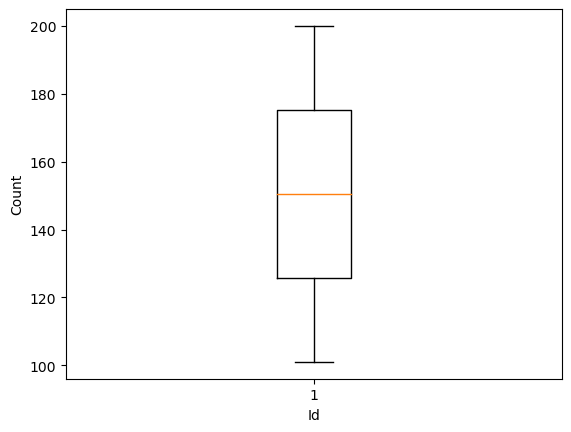

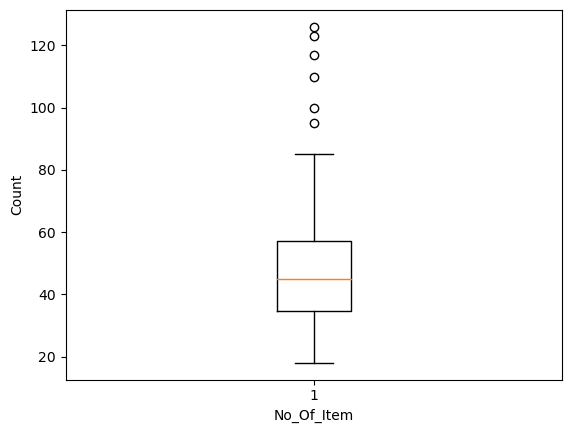

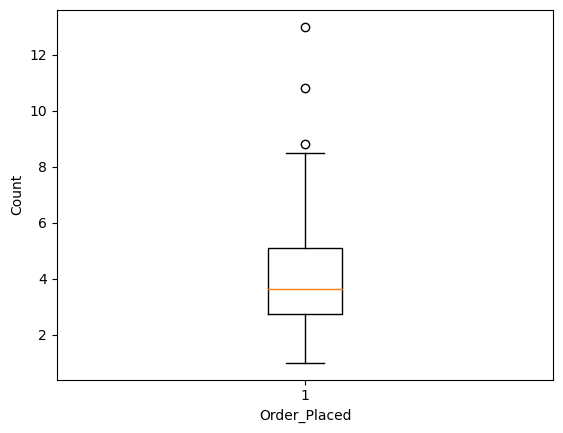

In [75]:
for i in data.columns:
    if ((data[i].dtype !='object') & (i!='Revenue')):
        
        plt.boxplot(data[i])
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.show()

In [76]:
out_col=['No_Of_Item','Order_Placed']

In [77]:
for j in out_col:
    
    Q1=data[j].quantile(0.25)
    Q3=data[j].quantile(0.75)
    
    IQR=Q3-Q1
    
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    
    data=data[(data[j]>=lower) & (data[j]<=upper)]

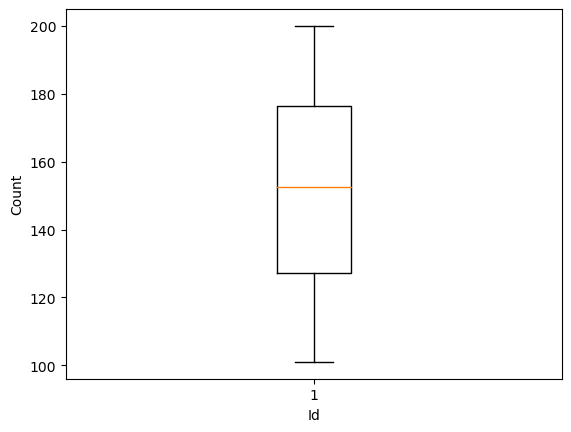

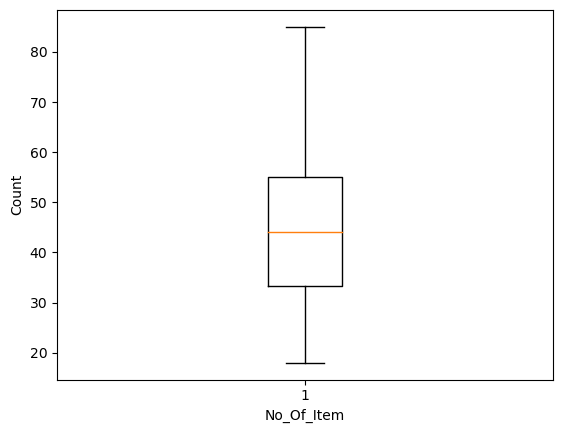

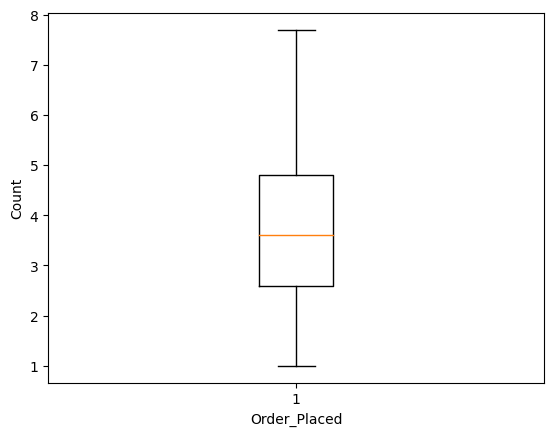

In [78]:
for i in data.columns:
    if ((data[i].dtype !='object') & (i!='Revenue')):
        
        plt.boxplot(data[i])
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.show()

In [80]:
### Dropping irrelevant columns

data=data.drop(columns=["Id","Name","Franchise","Category","City","No_Of_Item"])

In [82]:
x=data.iloc[:,:-1]
x

,Order_Placed
0,5.5
1,6.8
2,1.9
3,2.5
4,4.2
...,...
95,1.1
96,6.3
97,6.2
98,2.1


In [83]:
y=data['Revenue']
y

0     5953753
1     7223131
2     2555379
3     2175511
4     4816715
       ...   
95    1270499
96    6412623
97    6694797
98    2344689
99    4567678
Name: Revenue, Length: 94, dtype: int64

In [86]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=38)

### Linear Regression

In [87]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [89]:
lrpred=lr.predict(xtest)

### Visualising the Training set results

Text(0, 0.5, 'Revenue')

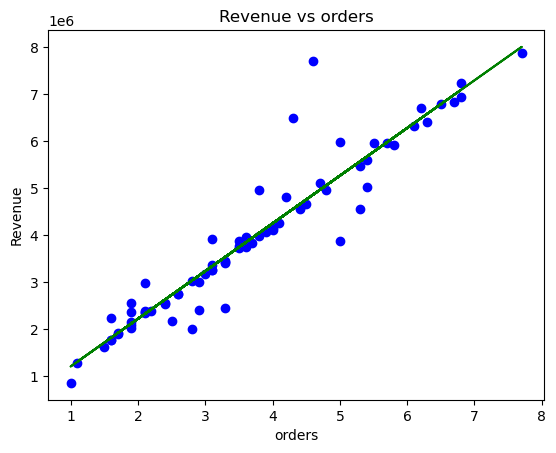

In [92]:
plt.scatter(xtrain,ytrain,color="blue")
plt.plot(xtrain,lr.predict(xtrain),color="green")
plt.title("Revenue vs orders")
plt.xlabel("orders")
plt.ylabel("Revenue")

### Visualising the Test set results

Text(0, 0.5, 'Revenue')

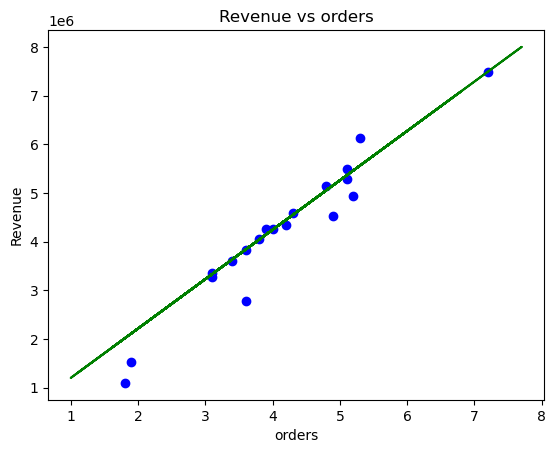

In [93]:
plt.scatter(xtest,ytest,color="blue")
plt.plot(xtrain,lr.predict(xtrain),color="green")
plt.title("Revenue vs orders")
plt.xlabel("orders")
plt.ylabel("Revenue")

In [94]:
r2_score(lrpred,ytest)

0.8853510590633358